# Statlog (Heart)

In [1]:
import pandas as pd
import ehrapy as ep
import numpy as np

Installed version 0.2.0 of ehrapy is newer than the latest release 0.1.0! You are running a 
nightly version and features may break!

In [2]:
pd.set_option("display.max_columns", None)

## Getting the dataset

In [3]:
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.dat -O statlog_heart.data
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.doc

File ‘statlog_heart.data’ already there; not retrieving.
File ‘heart.doc’ already there; not retrieving.



# Data Wrangling

In [4]:
names = ['age', 'sex', 'chest pain type', 'resting blood pressure', 'serum cholestoral',
'fasting blood sugar', 'resting electrocardiographic results', 'maximum heart rate achieved', 'exercise induced angina', 'oldpeak',
'the slope of the peak exercise ST segment', 'number of major vessels', 'thal', 'class']

In [5]:
data = pd.read_csv("statlog_heart.data", sep=" ", names=names)

Since the dataset does not have a patient ID we add one.

In [6]:
data["patient_id"] = range(1, len(data) + 1)

Replace the original encoding (1, 2) to (0, 1) in class attribute

In [7]:
data["class"].replace((1, 2), (0, 1), inplace=True)

In [8]:
data.set_index("patient_id", inplace=True)

In [9]:
data.to_csv("statlog_heart_prepared.csv")

## ehrapy sanity check

In [10]:
adata = ep.io.read("statlog_heart_prepared.csv",
                   extension="csv",
                   index_column="patient_id")

In [11]:
adata.var_names

Index(['age', 'sex', 'chest pain type', 'resting blood pressure',
       'serum cholestoral', 'fasting blood sugar',
       'resting electrocardiographic results', 'maximum heart rate achieved',
       'exercise induced angina', 'oldpeak',
       'the slope of the peak exercise ST segment', 'number of major vessels',
       'thal', 'class'],
      dtype='object')

In [12]:
ep.pp.type_overview(adata)

Variable names for AnnData object with 14 vars and 270 obs                                   
╚══ 🔓 Unencoded variables                                                                   
    ╠══ age -> data type: floating                                                           
    ╠══ sex -> data type: floating                                                           
    ╠══ chest pain type -> data type: floating                                               
    ╠══ resting blood pressure -> data type: floating                                        
    ╠══ serum cholestoral -> data type: floating                                             
    ╠══ fasting blood sugar -> data type: floating                                           
    ╠══ resting electrocardiographic results -> data type: floating                          
    ╠══ maximum heart rate achieved -> data type: floating                                   
    ╠══ exercise induced angina -> data type: floating                                       
    ╠══ oldpeak -> data type: floating                                                       
    ╠══ the slope of the peak exercise ST segment -> data type: floating                     
    ╠══ number of major vessels -> data type: floating                                       
    ╠══ thal -> data type: floating                                                          
    ╚══ class -> data type: floating                                                         

Quality control metrics missing. Calculating...

scikit-learn-intelex is not available. Install via pip install scikit-learn-intelex  for 
faster imputations.

/Users/xinyuezhang/opt/anaconda3/envs/ehrapy/lib/python3.8/site-packages/rich/live.py:221: 
UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/Users/xinyuezhang/opt/anaconda3/envs/ehrapy/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/Users/xinyuezhang/opt/anaconda3/envs/ehrapy/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


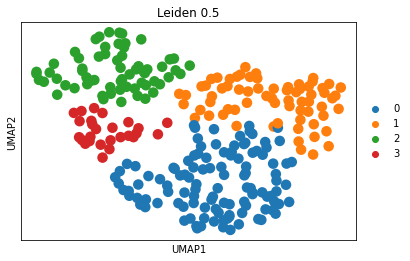

In [13]:
ep.pp.knn_impute(adata)
ep.pp.norm_scale(adata)
ep.pp.pca(adata)
ep.pp.neighbors(adata)
ep.tl.umap(adata)
ep.tl.leiden(adata, resolution=0.5, key_added="leiden_0_5")
ep.pl.umap(adata, color=["leiden_0_5"], title="Leiden 0.5")

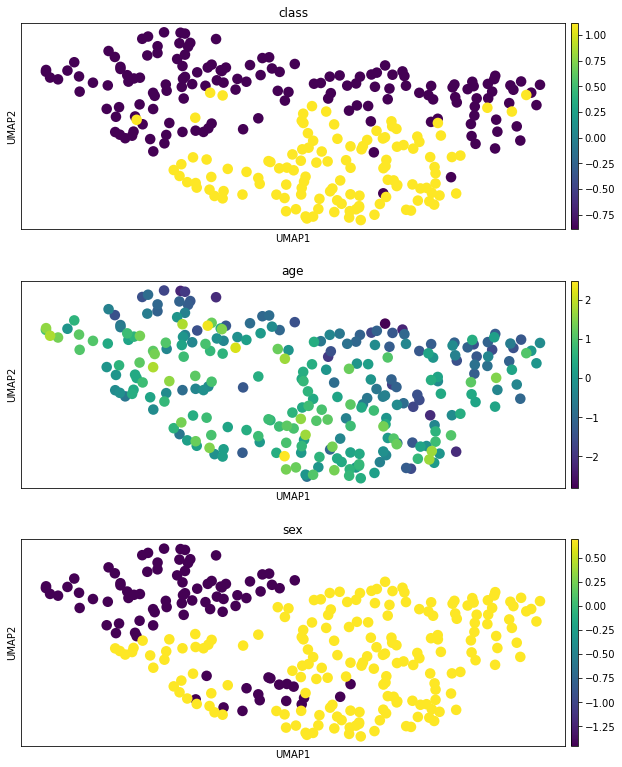

In [14]:
ep.pl.umap(adata, color=["class", "age", "sex"], ncols=1, wspace=0.75)